**TODO**:
* Add structure
* Move section one "For present branch" into different file/branch
* Proof-read and flesh out any terse parts
* Work out minimal amount of pandas we can get away with in "pandas primer"
* Exercise extension involving a merge operation
* "Resources" section including snippets for various API's
* Use RISE to make presentation version
* Install requirements in the pre-amble
* Search for some more visual components to break up the text

In [78]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# install im_tutorial package
# !pip install git+https://github.com/nestauk/im-tutorials.git 
    
# install other packages we need
!pip install ratelim

In [99]:
def pipe_print(df):
    display(df)
    return df

# For `present` branch
i.e. material that links the API and web scraping tutorials together in the context of YSI Utrecht

## Schedule

## Python primer

[Links to resources; pre-circulate these too](google.com)

## Getting data 101 

There are many ways to get data:  

* Data dumps

 We download a file (from the web, USB stick etc.)
 Could be from a provider
 
 

* Databases
     We write a SQL query. e.g.
```
SELECT Name, Number_Of_Hands FROM Characters WHERE
Name LIKE '%Skywalker%';
```
Result:
``` 
| Name             | Number_Of_Hands   |
|------------------+-------------------|
| Luke Skywalker   |                 1 |
| Anakin Skywalker |                 1 |
| Leia Skywalker   |                 2 |
| Shmi Skywalker   |                 2 |
```

* **API's** - "Application Programming Interface"

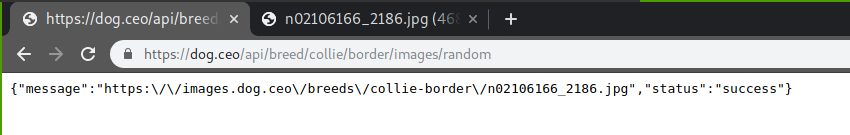

![alt](figures/collie.png)

[Tutorial here]()

* **Web scraping**

[Tutorial here]()

# Introduction to requests and API's

## Structure

## What you will be able to do after the tutorial

- Understand what a (RESTful) API is
- Understand what a HTTP request is
- Use Python to make requests to an API
- Use Python to work with JSON data
- Use Python to read JSON data into a Dataframe and plot it
      
      

## Prerequisites

Before we get started with using API's in python we need to know a little more first.

### APIs : What and why
    
An API (Application Programming interfaces) is a way for two different applications to communicate. 
To retrieve data from an API, a request to a remote web server is made.
For example if you want to build an application which plots stock prices, you will use the API of google finance, for example, to request the current stock prices at some given interval.

APIs are useful where:
* Data is changing quickly, e.g. stock prices
* The whole dataset is not required, e.g. the tweets of one user
* Repeated computation is involved, e.g. Spotify API that tells you the genre of a piece of music

#### REST

Most API's you come across will be RESTful, i.e. they provide a REST (REpresentational State Transfer) interface.
REST uses standard HTTP commands which means that getting data from an API is similar to accessing a webpage. 
For example, When you type `www.duckduckgo.com` in your browser, your browser is asking the `www.duckduckgo.com` server for a webpage by making a `GET` HTTP (Hypertext Transfer Protocol) request. Making a REST `GET` request instead retrieves data (rather than a webpage).
Similarly, while your browser uses `POST` to submit the contents of a form, REST using `POST` to update data.
REST also uses other HTTP commmands such as `PUT` - for creating data - and `DELETE` - for removing data.

HTTP is a text-based protocol (the response is always text) and could return a response in any format - this is typically found in the API documentation - though data is more often than not returned in JSON format.

As they are used to retrieve data `GET` requests are the most commonly used type of request, therefore we will restrict ourselves to `GET` in this tutorial.

#### JSON

JSON (JavaScript Object Notation) is a format for sending data, that is meant to be human readable and easy to parse (It was derived from JavaScript but is language-independent).

It uses attribute-value pairs (e.g. python dictionaries `{"name": "Pizza", "foodRanking": 1}`) and array data-types (e.g. python lists `[1, 2, 3]`)

Example JSON representation :
```
{
  "firstName": "Donald",
  "lastName": "Trump",
  "age": 73,
  "isAlive": true,
  "color": "orange",
  "addresses": [
      {
          "streetAddress": "1600 Pennsylvania Avenue NW",
          "city": "Washington, D.C.",
          "state": "null",
          "postalCode": "20500",
          "country": "US"
      },
      {
          "streetAddress": "721 Fifth Avenue",
          "city": "NYC",
          "state": "NY",
          "postalCode": "10022",
          "country": "US"
      }
  ],
}
```


#### Status codes

How do I know my request was successful?

Servers issue numeric [status codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) in response to HTTP requests that indicate whether a request has been successfully completed.

Some common ones relating to `GET` requests are:
* `200` - Success
* `300` - The API is redirecting to a different endpoint
* `400` - Bad request
* `401` - Not authenticated
* `403` - Forbidden
* `404` - Not found
* `429` - Too many requests

### Pandas primer

We will be using Pandas (a contraction of panel data). Pandas is a python library for doing practical, real world data analysis.

Being comfortable with using pandas is a tutorial (or set of tutorials) alone, so don't worry if you're unfamiliar, but we will pick up the basics 

More here [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html).
#### Series

#### DataFrame

Make with:
* list
* dict (JSON)

Functions:
* `df.index`
* `df.columns`
* `df['col']` , `df.col`, `df.loc[:, 'col']`, `df.iloc[:, 0]`
* `df.describe()`
* `df.T`
* `df.sort_index`, `df.sort_values`
* `df[df.col > 0]`, `df[df > 0]`
* `df['col_times_2'] = df['col'] * 2`
* `df.dropna`, `df.fillna`
* `df.mean`
* `df.apply`
* `pd.merge`
* `df.plot`
* `df.groupby`
* `df.stack`, `df.unstack`?
* `pd.read_csv`, `df.to_csv`, `pd.read_json`

## Example API: Eurostat

Let's dive in by looking at an API that can be of use to us, the [EUROSTAT API](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services).

The documentation linked gives a very useful summary of the structure of the requests:
![](figures/eurostat_api.png)
 
 

Let's jump in and learn by example how we use Python to get the data for a REST GET request on this dataset (nama_10_gdp).

We will use the Python library `requests`.

In [148]:
import requests  # Import the requests library

# Query URL
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/nama_10_gdp?precision=1&unit=clv05_meur'
       '&geo=nl&geo=de'
       # some api's will have nicer syntax like `&time=2010..2012`
       '&time=2010&time=2011&time=2012'
       # some api's will have nicer syntax like `&na_item=b1gq,d21`
       '&na_item=b1gq&na_item=d21'
       )
       
response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)
# NOTE: Could use print(response.json()) but this wouldn't be formatted nicely

Request returned 200 : 'OK'
{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'DE': 0, 'NL': 1},
                                    'label': {'DE': 'Germany (until 1990 '
                                                    'former territory of the '
                                                    'FRG)',
                                              'NL': 'Netherlands'}},
                       'label': 'geo'},
               'na_item': {'category': {'index': {'B1GQ': 0, 'D21': 1},
                                        'label': {'B1GQ': 'Gross domestic '
                                                          'product at market '
                                                          'prices',
                                                  'D21': 'Taxes on products'}},
                           'label': 'na_item'},
               'time': {'category': {'index': {'2010': 0, '2011': 1, '2012': 2},
                                     'label': {'2010': '201

SUCCESS! But what's the structure of our data?

In [149]:
payload['value']  # The values returned aren't very informative!

{'0': 2426650.8,
 '1': 2521875.8,
 '2': 2532456.4,
 '3': 589946.6,
 '4': 599097.8,
 '5': 592925.0,
 '6': 228297.9,
 '7': 237275.9,
 '8': 236325.2,
 '9': 60631.6,
 '10': 59852.5,
 '11': 57924.1}

In [150]:
list(zip(payload['id'], payload['size']))  # Dimensions of our data (1 x 2 x 1 x 3)

[('unit', 1), ('na_item', 2), ('geo', 2), ('time', 3)]

In [151]:
payload['dimension']  # Gives us the dimension details of the data

{'unit': {'label': 'unit',
  'category': {'index': {'CLV05_MEUR': 0},
   'label': {'CLV05_MEUR': 'Chain linked volumes (2005), million euro'}}},
 'na_item': {'label': 'na_item',
  'category': {'index': {'B1GQ': 0, 'D21': 1},
   'label': {'B1GQ': 'Gross domestic product at market prices',
    'D21': 'Taxes on products'}}},
 'geo': {'label': 'geo',
  'category': {'index': {'DE': 0, 'NL': 1},
   'label': {'DE': 'Germany (until 1990 former territory of the FRG)',
    'NL': 'Netherlands'}}},
 'time': {'label': 'time',
  'category': {'index': {'2010': 0, '2011': 1, '2012': 2},
   'label': {'2010': '2010', '2011': '2011', '2012': '2012'}}}}

In [152]:
list_of_keys = []
for k in payload['id']:
    list_of_keys.append(
        payload['dimension'][k]['category']['index'].keys()
        )
print(list_of_keys)
    
# NOTE: Equivalent to: [payload['dimension'][k]['category']['index'].keys() for k in payload['id']]

[dict_keys(['CLV05_MEUR']), dict_keys(['B1GQ', 'D21']), dict_keys(['DE', 'NL']), dict_keys(['2010', '2011', '2012'])]


In [153]:
index = pd.MultiIndex.from_product(
    [payload['dimension'][k]['category']['index'].keys() for k in payload['id']],
    names=payload['id']
)
index

MultiIndex(levels=[['CLV05_MEUR'], ['B1GQ', 'D21'], ['DE', 'NL'], ['2010', '2011', '2012']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['unit', 'na_item', 'geo', 'time'])

In [154]:
pd.DataFrame(payload['value'].values(), index=index, columns=['value'])

value
unit       na_item geo time           
CLV05_MEUR B1GQ    DE  2010  2426650.8
                       2011  2521875.8
                       2012  2532456.4
                   NL  2010   589946.6
                       2011   599097.8
                       2012   592925.0
           D21     DE  2010   228297.9
                       2011   237275.9
                       2012   236325.2
                   NL  2010    60631.6
                       2011    59852.5
                       2012    57924.1

In [157]:
# Let's calculate the means (across years) for each country and each `na_item`
(pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
.groupby(['na_item', 'geo'])
.mean()
)

value
na_item geo              
B1GQ    DE   2.493661e+06
        NL   5.939898e+05
D21     DE   2.339663e+05
        NL   5.946940e+04

In [159]:
# We can "unstack" indexes to become columns
(pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
 .unstack('na_item')
 )

value          
na_item                   B1GQ       D21
unit       geo time                     
CLV05_MEUR DE  2010  2426650.8  228297.9
               2011  2521875.8  237275.9
               2012  2532456.4  236325.2
           NL  2010   589946.6   60631.6
               2011   599097.8   59852.5
               2012   592925.0   57924.1

In [175]:
# We can reverse this with "stack"
# `stack` makes a dataset longer (taller) and `unstack` makes a dataset wider
(pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
 .unstack('na_item')
 .stack('na_item')
 )

value
unit       geo time na_item           
CLV05_MEUR DE  2010 B1GQ     2426650.8
                    D21       228297.9
               2011 B1GQ     2521875.8
                    D21       237275.9
               2012 B1GQ     2532456.4
                    D21       236325.2
           NL  2010 B1GQ      589946.6
                    D21        60631.6
               2011 B1GQ      599097.8
                    D21        59852.5
               2012 B1GQ      592925.0
                    D21        57924.1

In [161]:
# Accessing for a single `na_item`
# Gives an error as we have two levels of columns
(pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
 .unstack('na_item')
 ['D21']
 )

KeyError: 'D21'

value                             
na_item               B1GQ                 D21         
geo                     DE        NL        DE       NL
unit       time                                        
CLV05_MEUR 2010  2426650.8  589946.6  228297.9  60631.6
           2011  2521875.8  599097.8  237275.9  59852.5
           2012  2532456.4  592925.0  236325.2  57924.1

value                             
na_item       B1GQ                 D21         
geo             DE        NL        DE       NL
time                                           
2010     2426650.8  589946.6  228297.9  60631.6
2011     2521875.8  599097.8  237275.9  59852.5
2012     2532456.4  592925.0  236325.2  57924.1

na_item       B1GQ                 D21         
geo             DE        NL        DE       NL
time                                           
2010     2426650.8  589946.6  228297.9  60631.6
2011     2521875.8  599097.8  237275.9  59852.5
2012     2532456.4  592925.0  236325.2  57924.1

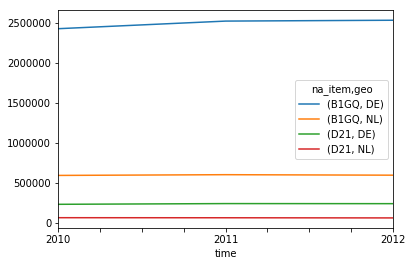

In [164]:
(pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
 .unstack(['na_item', 'geo'])  # unstacks indices (makes our dataset wider)
 .pipe(pipe_print)
 .droplevel('unit', axis=0)  # Everything is in the same unit so we drop it
 .pipe(pipe_print)
 .droplevel(0, axis=1)  # OR: ['value']
 .pipe(pipe_print)
 .plot()
 )
 
# NOTE: `.pipe(pipe_print)` just passes the dataframe to a function that prints
#       out the dataframe and then passes it on through the chain of commands

### Exercise

* Get the data for dataset `rd_e_berdindr2` from the Eurostat API for all NACE activities as a percentage of GDP
* Read the data into a pandas dataframe
* Calculate the total expenditure across countries each year
* Plot it

Links:
* [Query builder](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder)
* [Data Explorer](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=rd_e_berdindr2&lang=en)
* [Metadata](https://ec.europa.eu/eurostat/cache/metadata/en/rd_esms.htm)


**Hint**:
If you look at the data-explorer/metadata/response you will see that there won't be a `payload['value']` for every possible index - there is missing data.
To deal with this we can create a quick workaround by using a `defaultdict` from the `collections` library.
A default dict takes a function and a dictionary as arguements. When a value is looked up in the dictionary that isn't found it calls and returns the function passed to `defaultdict`. 

Below we create a `defaultdict` that returns `None` for indexes that aren't there and builds a new dictionary that fills in the missing data:

``` python
from collections import defaultdict
n = len(index)  # Length of our index
def return_none():
    return None
d = defaultdict(return_none, payload['value'])  # Build default dict
values = [
    d[str(i)]  # Lookup `i` in dictionary
    for i in range(n)  # Numberical indexes
]
```
NOTE: We use `str(i)` because the keys of the dictionaries are strings not integers so we need to convert

In [264]:
## Solution

# Make the request
import requests
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/rd_e_berdindr2?precision=1&unit=PC_GDP&nace_r2=TOTAL'
       )
try:
    response = requests.get(url)
    response.raise_for_status()  # Gives an error if not successful
except:
    print(response.reason)
    raise

# Parse into JSON
payload = response.json()

# Define the index from `payload['dimension']`
index = pd.MultiIndex.from_product(
    [payload['dimension'][k]['category']['index'] for k in payload['id']]
    , names = payload['id']
)
index

# Fill in gaps in data
from collections import defaultdict
n = len(index)
def return_none():
    return None
d = defaultdict(return_none, payload['value'])
values = [d[str(i)] for i in range(n)]

# Read into dataframe, manipulate and plot
(pd.DataFrame(values, index=index)
    # Make dataframe wider
   .unstack('time')
   .droplevel(0, axis=1)
    # Get totals
   .sum()
    # Plot
   .plot()
)

### Real-world considerations for Requests

Things do not always go so nicely, particularly when using API's at scale.

We'll quickly cover some other common considerations when using API's, and outline how they can be solved.

#### Retries

Sometimes you can do everything perfectly, and send off a request but something on the web-server (or elsewhere) can go wrong and give a bad status code.
We don't want to silently ignore these errors or let them crash our program by raising an exception.
The first port of call is to retry the request again.

A hacky way to do this would be (**don't do this**):

``` python
import time
import requests

def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
    except:
        time.sleep(1)  # sleep for a bit in case that helps
        return get(url)  # try again
```

A better and easier way to do this is to use the [tenacity](https://github.com/jd/tenacity) library:

``` python
import requests
from tenacity import retry, stop_after_attempt, wait_fixed

@retry(stop=stop_after_attempt(3), wait=wait_fixed(0.1))
def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
        return r
    except:
        print(r.status_code, r.reason)
        raise
```

It uses a python decorator (the `@` symbol) to wrap our function with another function `retry` that will retry if we raise and error.
We can it how many times to stop trying after, and how long to wait between each retry if we want.

#### Headers/authentication

Not all API's are open for immediate use. For example, some require you pay for access (e.g. the google maps API) and some require you to register for access first.
When you get access to a "closed" API, you will typically get an API key - a long string of letters and numbers - which is unique to you which you need to send along with any GET request you make to the API.
This lets the API know who you are and decide how to deal with your request.

Several different types of authentication exists (read the specific API docs) but the most common way is:
``` python
api_key = 'asodifhafglkkhj'
r = requests.get(url, auth=(api_key, ''))
```

#### Rate limits

API's can be costly to host and typically limit the number of requests that can be made (either by an IP or API key).
If you exceed this limit you'll get a `429` status code for any extra requests you make (and may be blocked if you continue making them).

It is important to therefore respect any rate limits given in an API's documentation (annoyingly some are very vague).
The simplest way to do this is to limit how often the number of times our function that makes the request can be called using the [ratelim](https://pypi.org/project/ratelim/) library - again using decorators.

In [309]:
%%time
# This is a Jupyter "magic" that times how long it takes to execute a cell

import ratelim

# 10 times in 5 seconds
@ratelim.greedy(10, 5)
def hello_greedy():
    print("hello")
    
# Fast
for i in range(10):
    hello_greedy()

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
CPU times: user 587 µs, sys: 0 ns, total: 587 µs
Wall time: 501 µs


In [311]:
%%time

import ratelim
# 10 times in 5 seconds
# Gets called at most every 0.5 seconds
@ratelim.patient(10, 5)
def hello_patient():
    print("hello")


# Takes 4.5s
for i in range(10):
    hello_patient()

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
CPU times: user 7.32 ms, sys: 10 ms, total: 17.4 ms
Wall time: 4.51 s


## Resources

### List of API's

### API wrapper libraries

### More detailed tutorials
